In [ ]:
import elm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from pandas import read_csv
import seaborn as sns
stdsc = StandardScaler()

In [ ]:
dataset = read_csv('C1.csv')
dataset.fillna(0, inplace=True)
values = dataset.values

In [ ]:
dataset.describe()

,Beam Irradiance (W/m^2),Diffuse Irradiance (W/m^2),Ambient Temperature (C),Wind Speed (m/s),Plane of Array Irradiance (W/m^2),Cell Temperature (C),DC Array Output (W),AC System Output (W)
count,8.761000e+03,8.761000e+03,8761.000000,8761.000000,8.761000e+03,8761.000000,8.761000e+03,8.761000e+03
mean,3.315085e+02,2.298178e+02,47.061112,5.640840,4.700240e+02,57.691146,1.451962e+03,1.391753e+03
std,1.551523e+04,1.075561e+04,2202.219536,263.966119,2.199704e+04,2699.670974,6.795135e+04,6.513364e+04
min,0.000000e+00,0.000000e+00,9.900000,0.100000,0.000000e+00,9.900000,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,20.000000,1.700000,0.000000e+00,20.000000,0.000000e+00,0.000000e+00
50%,0.000000e+00,1.000000e+00,22.900000,2.600000,9.440000e-01,23.674000,3.324000e+00,0.000000e+00
75%,2.370000e+02,1.810000e+02,26.900000,3.600000,4.759930e+02,36.890000,1.523269e+03,1.464682e+03
max,1.452173e+06,1.006717e+06,206151.200000,24709.700000,2.058940e+06,252716.065000,6.360321e+06,6.096574e+06


In [ ]:
df1=dataset['DC Array Output (W)']
df1 = df1.iloc[:-24]
df1

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8732    0.0
8733    0.0
8734    0.0
8735    0.0
8736    0.0
Name: DC Array Output (W), Length: 8737, dtype: float64

Text(0, 0.5, 'DC solar power in Watts')

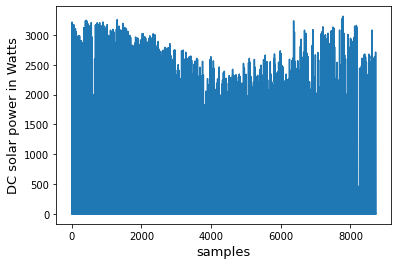

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)
plt.xlabel('samples',fontsize=13)
plt.ylabel('DC solar power in Watts', fontsize=13)

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step):
        dataX, dataY = [], []
        for i in range(len(dataset)-time_step-1):
            a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----499   500 
            dataX.append(a)
            dataY.append(dataset[i + time_step, 0])
        return np.array(dataX), numpy.array(dataY)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
training_size=int(len(df1)*0.7)
test_size=len(df1)-training_size
train,test=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
time_step = 24
X_train1, y_train1 = create_dataset(train, time_step)
X_test1, ytest1 = create_dataset(test, time_step)

In [ ]:
print(X_train1.shape,y_train1.shape)

(6090, 24) (6090,)


In [ ]:
# build model and train
l = []
from sklearn.metrics import *
for i in range(10,51):
  model = elm.elm(hidden_units=i, activation_function='sigmoid', random_type='normal', x=X_train1, y=y_train1, C=1, elm_type='reg')
  beta, train_score, running_time = model.fit('no_re')
  y_pred1 = model.predict(X_test1)
  R2 = r2_score(ytest1,y_pred1) # regression score(ratio of actual vs predicted)
  l.append(R2)
print("regression running time:", running_time + 's')
print(l)

[0.7603452789528371, 0.8591243742979829, 0.8574262424881552, 0.8578635299166149, 0.8687368127417177, 0.8677084358975424, 0.8577716046913649, 0.901552377300905, 0.8754858309611769, 0.8770054241378105, 0.8863273352069596, 0.9053292202614714, 0.9097509120001258, 0.9048750228340846, 0.9079986802383679, 0.9118518329436973, 0.9117665182765009, 0.910056715384669, 0.9140473416013556, 0.9140635600679792, 0.9207548574530158, 0.9211406065036802, 0.9176887479907172, 0.9189558437022339, 0.9195150826437465, 0.9194748486049382, 0.9201639722200083, 0.9185547838105901, 0.9192602759169164, 0.9217352853170376, 0.9187466179936916, 0.9235022120211189, 0.923802603975832, 0.9237130448832773, 0.9237001873574403, 0.9207999338250354, 0.9224663568379353, 0.9217134622213125, 0.923640511195516, 0.9250130323115701, 0.9234721041904821]


In [ ]:
y_pred1 = model.predict(X_test1)

In [ ]:
y_pred1  =scaler.inverse_transform(y_pred1.reshape(-1, 1))

In [ ]:
ytest1=scaler.inverse_transform(ytest1.reshape(-1, 1))

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

MSE=70665.40755313687
R2=0.9234721041904821
RMSE=265.8296589042255
MAE=151.4580838928622


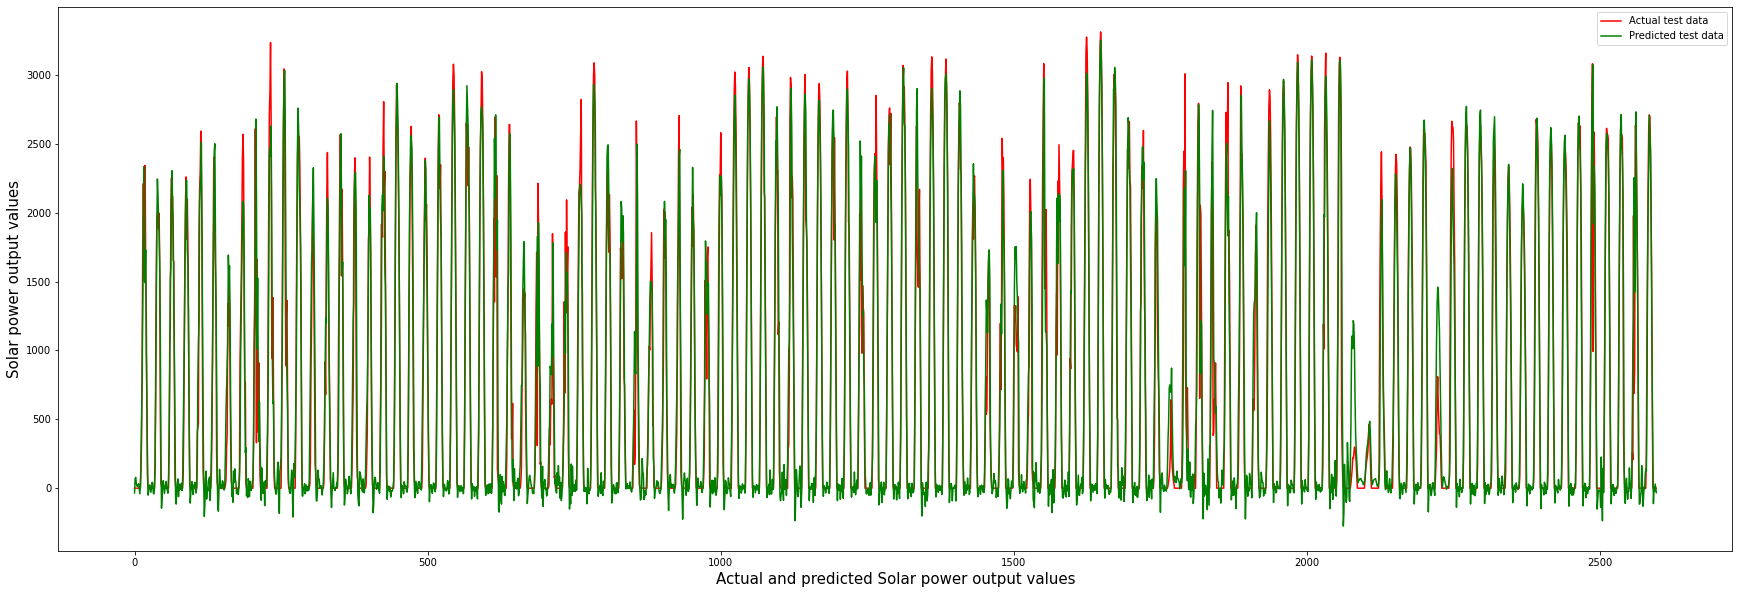

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (30,10)

from sklearn.metrics import *
from math import sqrt
MSE = mean_squared_error(ytest1,y_pred1)
R2 = r2_score(ytest1,y_pred1)
RMSE = sqrt(mean_squared_error(ytest1,y_pred1))
MAE = mean_absolute_error(ytest1,y_pred1)
plt.xlabel('Actual and predicted Solar power output values', fontsize=15)
plt.ylabel('Solar power output values', fontsize=15)
print("MSE={}".format(MSE))
print("R2={}".format(R2))
print("RMSE={}".format(RMSE))
print("MAE={}".format(MAE))

#plotting predicted test value vs actual test value
plt.plot(ytest1, label = 'Actual test data',color = "red")
plt.plot(y_pred1, label = 'Predicted test data',color = "green")
plt.legend()
plt.show()

Text(1, 2800, 'R-squared = 0.923')

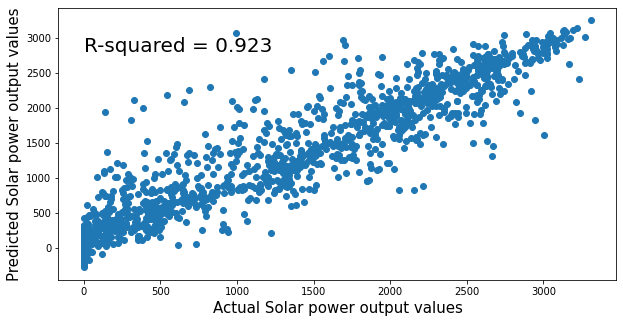

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
r_squared =R2
plt.rcParams['figure.figsize'] = (10,5)
plt.scatter(ytest1,y_pred1)
plt.xlabel('Actual Solar power output values', fontsize=15)
plt.ylabel('Predicted Solar power output values', fontsize=15)
plt.annotate("R-squared = {:.3f}".format(r2_score(ytest1,y_pred1)), (1,2800),fontsize=20)